In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

%matplotlib inline


In [2]:
amz_review=pd.read_csv('Reviews.csv')

In [3]:
amz_review.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [4]:
amz_review.shape

(568454, 10)

In [5]:
amz_review['Text'][0]

'I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than  most.'

In [6]:
amz_review['Summary'][0]

'Good Quality Dog Food'

In [7]:
amz_review.groupby(by=['UserId','ProductId']).count().sort_values(by=['Text'],ascending=False).head(25)

Id  ProfileName  HelpfulnessNumerator  \
UserId         ProductId                                           
A29JUMRL1US6YP B000WFKWDI  11           11                    11   
               B000WFU8O6  11           11                    11   
               B000WFN0VO  11           11                    11   
               B000WFORH0  11           11                    11   
               B000WFKI82  11           11                    11   
               B000WFEN74  11           11                    11   
               B000WFPJIG  11           11                    11   
               B000WFRQQ4  11           11                    11   
               B00008CQVA  11           11                    11   
               B000084EZ4  11           11                    11   
               B000WFUL3E  11           11                    11   
A3TVZM3ZIXG8YW B003M60K54  10           10                    10   
               B000084DWM  10           10                    10   
               B001VIY8BW  10           10                    10   
               B000QSN7P6  10           10                    10   
               B003ANFMY8  10           10                    10   
               B003BJOORW  10           10                    10   
               B003M5TG28  10           10                    10   
               B001VIYCK4  10           10                    10   
               B003MA8P02  10           10                    10   
               B0002MLA5K  10           10                    10   
               B003MW7858  10           10                    10   
               B003MWBFMK  10           10                    10   
               B003MWBFXY  10           10                    10   
               B003WK0D8O  10           10                    10   

                           HelpfulnessDenominator  Score  Time  Summary  Text  
UserId         ProductId                                                       
A29JUMRL1US6YP B000WFKWDI                      11     11    11       11    11  
               B000WFU8O6                      11     11    11       11    11  
               B000WFN0VO                      11     11    11       11    11  
               B000WFORH0                      11     11    11       11    11  
               B000WFKI82                      11     11    11       11    11  
               B000WFEN74                      11     11    11       11    11  
               B000WFPJIG                      11     11    11       11    11  
               B000WFRQQ4                      11     11    11       11    11  
               B00008CQVA                      11     11    11       11    11  
               B000084EZ4                      11     11    11       11    11  
               B000WFUL3E                      11     11    11       11    11  
A3TVZM3ZIXG8YW B003M60K54                      10     10    10       10    10  
               B000084DWM                      10     10    10       10    10  
               B001VIY8BW                      10     10    10       10    10  
               B000QSN7P6                      10     10    10       10    10  
               B003ANFMY8                      10     10    10       10    10  
               B003BJOORW                      10     10    10       10    10  
               B003M5TG28                      10     10    10       10    10  
               B001VIYCK4                      10     10    10       10    10  
               B003MA8P02                      10     10    10       10    10  
               B0002MLA5K                      10     10    10       10    10  
               B003MW7858                      10     10    10       10    10  
               B003MWBFMK                      10     10    10       10    10  
               B003MWBFXY                      10     10    10       10    10  
               B003WK0D8O                      10     10    10       10    10

In [8]:
((amz_review.groupby(by=['UserId','ProductId']).count().sort_values(by=['Text'],ascending=False)>1)==True).sum()

Id                        5859
ProfileName               5859
HelpfulnessNumerator      5859
HelpfulnessDenominator    5859
Score                     5859
Time                      5859
Summary                   5859
Text                      5859
dtype: int64

In [9]:
amz_review['Text_lenght']=amz_review['Text'].apply(lambda col: len(col.split(' ')))

In [10]:
amz_review.sort_values(by=['UserId','ProductId','Text_lenght'],ascending=False) #,ascending=False)>1)==True).sum()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Text_lenght
183896,183897,B001EO5SB2,AZZZOVIBXHGDR,Logan R. Freijo,0,0,2,1333497600,Disappointed,I ordered this cereal based on the good review...,88
131468,131469,B001SB22UG,AZZYCJOJLUDYR,"Hazel MccLellan ""H.M.""",0,0,5,1337472000,Amazing flavor!!,I use this all the time! Good for BBQ ing or p...,37
222780,222781,B000N9VLJ2,AZZY649VYAHQS,Worldwide1,1,1,5,1309737600,I Have Spoken.,All of the chocolate arrived with out melting ...,46
190697,190698,B000FI4O90,AZZVNIMTTMJH6,sugarwaif,0,0,5,1268179200,pretty amazing,i've wanted one of these since i saw it in an ...,119
422837,422838,B003SNX4YA,AZZV9PDNMCOZW,"Anne B. Ward ""Dr Anne B""",0,0,4,1329436800,I like it,Even though this mix is not as spicy as I anti...,69
312407,312408,B001E5E2QI,AZZV9PDNMCOZW,"Anne B. Ward ""Dr Anne B""",1,1,5,1310428800,Love this syrup,I love this syrup. It is my personal substitut...,57
338488,338489,B000AXSG2Q,AZZV9PDNMCOZW,"Anne B. Ward ""Dr Anne B""",0,0,5,1329436800,Just what I needed,This is a great addition to my Torani syrup. I...,51
246181,246182,B0009F3SBY,AZZV61COVM8CA,lucretia,0,0,5,1344816000,Tea- riffic!,"The most fabulous new flavor ever! spearmint, ...",26
486456,486457,B000FKMNUU,AZZUQYE2C1LNI,H. Hur,2,2,4,1278374400,Sugar Free but not calorie free,This product uses Sorbitol and Asparthame to a...,66
367715,367716,B003B3OOPA,AZZU5BA2CHYVF,C. Arnold,1,1,5,1343433600,Bliss in a Jar,"First of all, the fragrance is subtle and heav...",123


In [11]:
amz_review[(amz_review['UserId']=='A29JUMRL1US6YP') & (amz_review['ProductId']=='B000WFKWDI')].iloc[0:5]

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Text_lenght
146434,146435,B000WFKWDI,A29JUMRL1US6YP,HTBK,3,4,5,1278201600,Fantastic Food for Good Cat Health,The pet food industry can be one of the most i...,347
146477,146478,B000WFKWDI,A29JUMRL1US6YP,HTBK,38,40,5,1278201600,Fantastic Food for Good Cat Health,The pet food industry can be one of the most i...,328
146483,146484,B000WFKWDI,A29JUMRL1US6YP,HTBK,19,23,5,1278201600,Fantastic Food for Good Cat Health,The pet food industry can be one of the most i...,358
146486,146487,B000WFKWDI,A29JUMRL1US6YP,HTBK,12,14,5,1278201600,Fantastic Food for Good Cat Health,The pet food industry can be one of the most i...,347
146493,146494,B000WFKWDI,A29JUMRL1US6YP,HTBK,7,8,5,1278201600,Fantastic Food for Good Cat Health,The pet food industry can be one of the most i...,346


In [12]:
amz_review[(amz_review['UserId']=='A29JUMRL1US6YP') & (amz_review['ProductId']=='B000WFKWDI')].iloc[0]['Text']

'The pet food industry can be one of the most infuriating as you start doing research and discovering what trash manufacturers (and the vets who get paid off by the manufacturers) push onto the unsuspecting public. For reference, don\'t ask your vet - do some Internet research at sites like, for example, [...]. What you\'ll find is that even the supposed "high-end" lines from basically every major supermarket label are horrible for your fuzzy friends. People who trust the marketing or trust their vets overpay and feed their cats foods that are full of carcinogens, cheap ingredients that are inappropriate for a cat\'s digestive system, and byproducts that provide nothing of value and are basically a way to make cheap profit off of literal garbage. It\'s a tragedy, as these same cats end up with shorter lifespans, kidney problems, UTIs, cancer, and a host of other issues, all of which could have been avoided by a high quality food.<br /><br />This is an A-Grade food. What you\'ll find he

In [13]:
amz_review[(amz_review['UserId']=='A29JUMRL1US6YP') & (amz_review['ProductId']=='B000WFKWDI')].iloc[1]['Text']

'The pet food industry can be one of the most infuriating as you start doing research and discovering what trash manufacturers (and the vets who get paid off by the manufacturers) push onto the unsuspecting public. For reference, don\'t ask your vet - do some Internet research at sites like, for example, [...]. What you\'ll find is that even the supposed "high-end" lines from basically every major supermarket label are horrible for your fuzzy friends. People who trust the marketing or trust their vets overpay and feed their cats foods that are full of carcinogens, cheap ingredients that are inappropriate for a cat\'s digestive system, and byproducts that provide nothing of value and are basically a way to make cheap profit off of literal garbage. It\'s a tragedy, as these same cats end up with shorter lifespans, kidney problems, UTIs, cancer, and a host of other issues, all of which could have been avoided by a high quality food.<br /><br />This is an A-Grade food. What you\'ll find he

In [14]:
amz_review.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text',
       'Text_lenght'],
      dtype='object')

(0, 10)

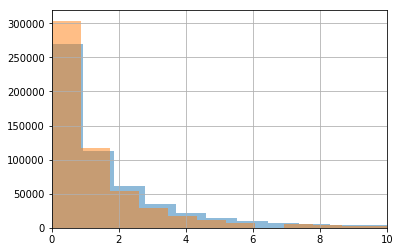

In [15]:
amz_review['HelpfulnessDenominator'].hist(bins=1000,alpha=0.5);
amz_review['HelpfulnessNumerator'].hist(bins=1000,alpha=0.5);
plt.xlim(0,10)

(100, 1000)

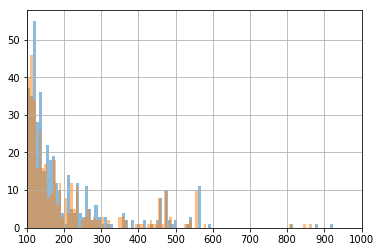

In [16]:
amz_review[amz_review['HelpfulnessDenominator']>100]['HelpfulnessDenominator'].hist(bins=100,alpha=0.5);
amz_review[amz_review['HelpfulnessNumerator']>100]['HelpfulnessNumerator'].hist(bins=100,alpha=0.5);
plt.xlim(100,1000)

(0, 400)

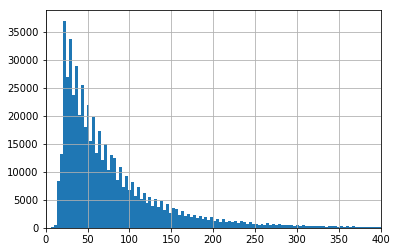

In [17]:
amz_review['Text_lenght'].hist(bins=1000);
plt.xlim(0,400)

In [18]:
amz_review['Time_converted']=amz_review['Time'].apply(lambda col: datetime.utcfromtimestamp(int(col)).strftime('%Y-%m-%d'))
#strftime('%Y-%m-%d %H:%M:%S'))
amz_review['Time_converted_ym']=amz_review['Time'].apply(lambda col: datetime.utcfromtimestamp(int(col)).strftime('%Y-%m'))

In [19]:
amz_review['Time_converted'].max()

'2012-10-26'

In [20]:
amz_review['Time_converted'].min()

'1999-10-08'

In [21]:
#amz_review_sorted=amz_review.sort_values(['Time_converted', 'UserId','ProductId','Text_lenght'], ascending=[False, False,False,False])

In [22]:
#amz_review_sorted.head()

In [23]:
amz_review.shape

(568454, 13)

In [24]:
#had to remove time since same revireer/item had more than same time frame unfortunately and keeping time in subset would not clean them

amz_review_sorted_drop_duplicated=amz_review.drop_duplicates(subset=['UserId','ProductId'], keep='first', inplace=False)

In [25]:
amz_review_sorted_drop_duplicated.shape

(560804, 13)

In [26]:
((amz_review_sorted_drop_duplicated.groupby(by=['UserId','ProductId']).count().sort_values(by=['Text'],ascending=False)>1)==True).sum()

Id                        0
ProfileName               0
HelpfulnessNumerator      0
HelpfulnessDenominator    0
Score                     0
Time                      0
Summary                   0
Text                      0
Text_lenght               0
Time_converted            0
Time_converted_ym         0
dtype: int64

In [27]:
amz_review_sorted_drop_duplicated.isnull().sum()

Id                         0
ProductId                  0
UserId                     0
ProfileName               16
HelpfulnessNumerator       0
HelpfulnessDenominator     0
Score                      0
Time                       0
Summary                   27
Text                       0
Text_lenght                0
Time_converted             0
Time_converted_ym          0
dtype: int64

In [28]:
def clean_span(col):
   
    
    if('<span' not in col.lower()):
        
#         temp=col.lower().split(' ')
#         rev_list=[]
#         for word in temp:
            
#             #for stop_w in stop_word_list:               
#             if (word not in stop_word_list):
#                 rev_list.append(word)

        return col.lower()

In [29]:
#pd.options.mode.chained_assignment = None
amz_review_sorted_drop_duplicated['Text_new']=amz_review_sorted_drop_duplicated['Text'].apply(clean_span)

/home/ania/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [30]:
amz_review_sorted_drop_duplicated.isnull().sum()

Id                          0
ProductId                   0
UserId                      0
ProfileName                16
HelpfulnessNumerator        0
HelpfulnessDenominator      0
Score                       0
Time                        0
Summary                    27
Text                        0
Text_lenght                 0
Time_converted              0
Time_converted_ym           0
Text_new                  373
dtype: int64

In [31]:
amz_review_sorted_drop_duplicated.dropna(inplace=True)

/home/ania/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [32]:
amz_review_sorted_drop_duplicated.isnull().sum()

Id                        0
ProductId                 0
UserId                    0
ProfileName               0
HelpfulnessNumerator      0
HelpfulnessDenominator    0
Score                     0
Time                      0
Summary                   0
Text                      0
Text_lenght               0
Time_converted            0
Time_converted_ym         0
Text_new                  0
dtype: int64

In [33]:
amz_review_sorted_drop_duplicated.shape

(560388, 14)

In [34]:
stop_word_list =[]
for word in open('stopword_short_long_mod.txt'):
    #print(word)
    stop_word_list.append(word.replace('\n',''))
    
stop_word_list=list(set(stop_word_list))   
len(stop_word_list)

642

In [35]:
#special characters
special_char_list=['\\','`','\"',"'",'*','_','{','}','[',']','(',')',';','@','^','&','>','#','+',':','-','_','=','|','>','<','~','.','!','$','/',',','?','%','0','1','2','3','4','5','6','7','8','9']

In [36]:
def remove_stopword(col):
        #print(stop_word_list)
        col_list=[]
        txt_col_split=col.lower().replace('\n'," ").strip().split(" ")
        #print(txt_col_split)
        for word_ in txt_col_split:
            #print(word)
            #print(word in col.split(" "))
            #for stop_w in stop_word_list:               
            if ((word_ not in stop_word_list) and len(word)>3):
                #col=col.replace(word,"") #.replace("  "," ")
                #print(col)
                col_list.append(word_)

        return (col_list)             
                
def remove_specialchar(col):
        #print(stop_word_list)
        for word in special_char_list:
            #print(word)
            #print(word in col.split(" "))
            
            #for stop_w in stop_word_list:               
            if word in col: #col.split(" "):
                col=col.replace(word,"").replace("  "," ")
                #print(col)

        return col                  
    

#amz_review_sorted_drop_duplicated['Text_new2']=amz_review_sorted_drop_duplicated.loc[:,'Text_new'].apply(remove_stopword)

In [37]:
text_test='The pet food industry can be one of the most infuriating as you start doing research and discovering what trash manufacturers (and the vets who get paid off by the manufacturers) push onto the unsuspecting public. For reference, don\'t ask your vet - do some Internet research at sites like, for example, [...]. What you\'ll find is that even the supposed "high-end" lines from basically every major supermarket label are horrible for your fuzzy friends. People who trust the marketing or trust their vets overpay and feed their cats foods that are full of carcinogens, cheap ingredients that are inappropriate for a cat\'s digestive system, and byproducts that provide nothing of value and are basically a way to make cheap profit off of literal garbage. It\'s a tragedy, as these same cats end up with shorter lifespans, kidney problems, UTIs, cancer, and a host of other issues, all of which could have been avoided by a high quality food.<br /><br />This is an A-Grade food. What you\'ll find here is very high protein content, many meats high on the list, flaxseed, good vitamins and antioxidants, and no grains, which is great as a cat is not an omnivore, it\'s a carnivore, and it simply does not need grains.<br /><br />What you will NOT find here is the kind of junk you\'ll see in things like Purina One and Science Diet - byproducts (aka beaks, feathers, bird feet), brewers rice (aka the waste product from making beer), wheat flour (a leading cause of pet allergies), corn gluten (a cheap waste of space), and things like "liver flavor" (because they don\'t want to pay for the real thing). I didn\'t just pull those ingredients out of the air - I was reading the ingredients list of Purina One. It\'s pathetic.<br /><br />Don\'t feed your cats trash. Pay a little more to feed them good food now, and they\'ll lead longer, healthier, more satisfied lives as a result. It\'s worth it.'

In [38]:
text2=remove_specialchar(clean_span(text_test))
text2

'the pet food industry can be one of the most infuriating as you start doing research and discovering what trash manufacturers and the vets who get paid off by the manufacturers push onto the unsuspecting public for reference dont ask your vet do some internet research at sites like for example what youll find is that even the supposed highend lines from basically every major supermarket label are horrible for your fuzzy friends people who trust the marketing or trust their vets overpay and feed their cats foods that are full of carcinogens cheap ingredients that are inappropriate for a cats digestive system and byproducts that provide nothing of value and are basically a way to make cheap profit off of literal garbage its a tragedy as these same cats end up with shorter lifespans kidney problems utis cancer and a host of other issues all of which could have been avoided by a high quality foodbr br this is an agrade food what youll find here is very high protein content many meats high

In [39]:
text3=remove_stopword(text2)
text3

['pet',
 'food',
 'industry',
 'infuriating',
 'start',
 'research',
 'discovering',
 'trash',
 'manufacturers',
 'vets',
 'paid',
 'manufacturers',
 'push',
 'unsuspecting',
 'public',
 'reference',
 'vet',
 'internet',
 'research',
 'sites',
 'like',
 'example',
 'find',
 'supposed',
 'highend',
 'lines',
 'major',
 'supermarket',
 'label',
 'horrible',
 'fuzzy',
 'friends',
 'people',
 'trust',
 'marketing',
 'trust',
 'vets',
 'overpay',
 'feed',
 'cats',
 'foods',
 'full',
 'carcinogens',
 'cheap',
 'ingredients',
 'inappropriate',
 'cats',
 'digestive',
 'system',
 'byproducts',
 'provide',
 'nothing',
 'cheap',
 'profit',
 'literal',
 'garbage',
 'tragedy',
 'cats',
 'end',
 'shorter',
 'lifespans',
 'kidney',
 'problems',
 'utis',
 'cancer',
 'host',
 'issues',
 'avoided',
 'high',
 'quality',
 'foodbr',
 'br',
 'agrade',
 'food',
 'find',
 'high',
 'protein',
 'content',
 'meats',
 'high',
 'list',
 'flaxseed',
 'good',
 'vitamins',
 'antioxidants',
 'grains',
 'great',
 'cat'

In [40]:
amz_review_sorted_drop_duplicated['Text_new2']=amz_review_sorted_drop_duplicated['Text_new'].apply(remove_specialchar)

/home/ania/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [41]:
amz_review_sorted_drop_duplicated['Text_new'].head()

0    i have bought several of the vitality canned d...
1    product arrived labeled as jumbo salted peanut...
2    this is a confection that has been around a fe...
3    if you are looking for the secret ingredient i...
4    great taffy at a great price.  there was a wid...
Name: Text_new, dtype: object

In [42]:
amz_review_sorted_drop_duplicated['Text_new2'].head()

0    i have bought several of the vitality canned d...
1    product arrived labeled as jumbo salted peanut...
2    this is a confection that has been around a fe...
3    if you are looking for the secret ingredient i...
4    great taffy at a great price there was a wide ...
Name: Text_new2, dtype: object

In [43]:
amz_review_sorted_drop_duplicated['Text_new3']=amz_review_sorted_drop_duplicated['Text_new2'].apply(remove_stopword)

/home/ania/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [44]:
amz_review_sorted_drop_duplicated['Text_new3'][0]

['bought',
 'vitality',
 'canned',
 'dog',
 'food',
 'products',
 'good',
 'quality',
 'product',
 'like',
 'stew',
 'processed',
 'meat',
 'smells',
 'better',
 'labrador',
 'finicky',
 'appreciates',
 'product',
 'better']

In [45]:
amz_review_sorted_drop_duplicated.isnull().sum()

Id                        0
ProductId                 0
UserId                    0
ProfileName               0
HelpfulnessNumerator      0
HelpfulnessDenominator    0
Score                     0
Time                      0
Summary                   0
Text                      0
Text_lenght               0
Time_converted            0
Time_converted_ym         0
Text_new                  0
Text_new2                 0
Text_new3                 0
dtype: int64

In [68]:
amz_review_sorted_drop_duplicated.dtypes

Id                         int64
ProductId                 object
UserId                    object
ProfileName               object
HelpfulnessNumerator       int64
HelpfulnessDenominator     int64
Score                      int64
Time                       int64
Summary                   object
Text                      object
Text_lenght                int64
Time_converted            object
Time_converted_ym         object
Text_new                  object
Text_new2                 object
Text_new3                 object
dtype: object

In [55]:
amz_review_sorted_drop_duplicated.to_csv('amazon_review_parsed_new2.csv',index=False)

In [56]:
check=pd.read_csv('amazon_review_parsed_new2.csv')

In [69]:
check.dtypes

Id                         int64
ProductId                 object
UserId                    object
ProfileName               object
HelpfulnessNumerator       int64
HelpfulnessDenominator     int64
Score                      int64
Time                       int64
Summary                   object
Text                      object
Text_lenght                int64
Time_converted            object
Time_converted_ym         object
Text_new                  object
Text_new2                 object
Text_new3                 object
dtype: object

In [74]:
eval(check['Text_new3'][0])
# import ast
# fruits = ast.literal_eval(fruits)

['bought',
 'vitality',
 'canned',
 'dog',
 'food',
 'products',
 'good',
 'quality',
 'product',
 'like',
 'stew',
 'processed',
 'meat',
 'smells',
 'better',
 'labrador',
 'finicky',
 'appreciates',
 'product',
 'better']

In [76]:
check['Text_new3']=check['Text_new3'].apply(lambda x: eval(x))

In [78]:
check['Text_new3'][0:5]

0    [bought, vitality, canned, dog, food, products...
1    [product, arrived, labeled, jumbo, salted, pea...
2    [confection, centuries, light, pillowy, citrus...
3    [secret, ingredient, robitussin, addition, roo...
4    [great, taffy, great, price, wide, assortment,...
Name: Text_new3, dtype: object

In [63]:
amz_review_sorted_drop_duplicated['Text_new3'][0]

['bought',
 'vitality',
 'canned',
 'dog',
 'food',
 'products',
 'good',
 'quality',
 'product',
 'like',
 'stew',
 'processed',
 'meat',
 'smells',
 'better',
 'labrador',
 'finicky',
 'appreciates',
 'product',
 'better']

In [65]:
check['Text_new3'].astype(object)[0]

"['bought', 'vitality', 'canned', 'dog', 'food', 'products', 'good', 'quality', 'product', 'like', 'stew', 'processed', 'meat', 'smells', 'better', 'labrador', 'finicky', 'appreciates', 'product', 'better']"

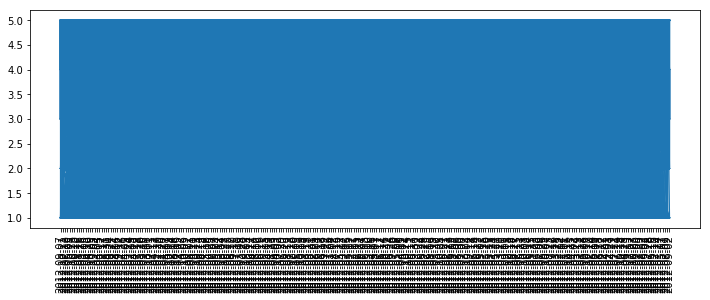

In [107]:
recent1=amz_review[(amz_review['Time_converted_ym']>'2012-01')]
#recent2=amz_review[(amz_review['Time_converted']>'2012-01-26') & (amz_review['Score']==1)]
plt.rcParams['agg.path.chunksize'] = 10000
plt.figure(figsize=(12,4))
plt.plot(recent1['Time_converted'],recent1['Score']);
#plt.plot(recent2['Time_converted'],recent2['Score']);
plt.xticks(rotation=90);

In [117]:
recent2=recent1.groupby(by=['Time_converted_ym','Score']).mean()
recent2.head(10)
# plt.rcParams['agg.path.chunksize'] = 10000
# plt.figure(figsize=(12,4))
# plt.plot(recent2['Time_converted_ym'],recent2['Score']);
# #plt.plot(recent2['Time_converted'],recent2['Score']);
# plt.xticks(rotation=90);

Id  HelpfulnessNumerator  \
Time_converted_ym Score                                        
2012-02           1      286618.163580              1.718621   
                  2      281130.102588              1.453789   
                  3      280316.439610              0.874026   
                  4      287616.702315              0.689452   
                  5      285089.471416              0.832580   
2012-03           1      277961.081147              1.635083   
                  2      279204.070899              0.823578   
                  3      277331.624146              0.759681   
                  4      280454.499330              0.628265   
                  5      285243.081924              0.756777   

                         HelpfulnessDenominator          Time  Text_lenght  
Time_converted_ym Score                                                     
2012-02           1                    3.115741  1.329284e+09    87.511831  
                  2                    2.133087  1.329260e+09   100.914048  
                  3                    1.299351  1.329250e+09    99.924675  
                  4                    0.841970  1.329255e+09   101.382212  
                  5                    0.945004  1.329249e+09    80.248045  
2012-03           1                    3.015549  1.331846e+09    87.180272  
                  2                    1.445177  1.331885e+09   100.161583  
                  3                    1.210137  1.332012e+09   114.338269  
                  4                    0.823510  1.331951e+09   106.709645  
                  5                    0.873800  1.331851e+09    81.780063

In [85]:
amz_review[amz_review['Time_converted']>'2012-01-26 00:00:00']

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Text_lenght,Time_converted
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,31,2012-09-07 00:00:00
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,30,2012-10-21 00:00:00
5,6,B006K2ZZ7K,ADT0SRK1MGOEU,Twoapennything,0,0,4,1342051200,Nice Taffy,I got a wild hair for taffy and ordered this f...,72,2012-07-12 00:00:00
6,7,B006K2ZZ7K,A1SP2KVKFXXRU1,David C. Sullivan,0,0,5,1340150400,Great! Just as good as the expensive brands!,This saltwater taffy had great flavors and was...,53,2012-06-20 00:00:00
7,8,B006K2ZZ7K,A3JRGQVEQN31IQ,Pamela G. Williams,0,0,5,1336003200,"Wonderful, tasty taffy",This taffy is so good. It is very soft and ch...,28,2012-05-03 00:00:00
9,10,B00171APVA,A21BT40VZCCYT4,Carol A. Reed,0,0,5,1351209600,Healthy Dog Food,This is a very healthy dog food. Good for thei...,25,2012-10-26 00:00:00
12,13,B0009XLVG0,A327PCT23YH90,LT,1,1,1,1339545600,My Cats Are Not Fans of the New Food,My cats have been happily eating Felidae Plati...,79,2012-06-13 00:00:00
16,17,B001GVISJM,A3KLWF6WQ5BNYO,Erica Neathery,0,0,2,1348099200,poor taste,I love eating them and they are good for watch...,42,2012-09-20 00:00:00
17,18,B001GVISJM,AFKW14U97Z6QO,Becca,0,0,5,1345075200,Love it!,I am very satisfied with my Twizzler purchase....,27,2012-08-16 00:00:00
26,27,B001GVISJM,A3RXAU2N8KV45G,lady21,0,1,1,1332633600,Nasty No flavor,"The candy is just red , No flavor . Just plan...",22,2012-03-25 00:00:00


In [22]:
from nltk.corpus import stopwords


stop_word_list=(stopwords.words('english'))